# INFO 2950 Homework 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm
from numpy import random
import seaborn as sns

# Probability Distributions

### Probability Models Cheatsheet
| Model | Example | Random Variable | Parameters | Probability Mass Function |
| --- | --- | --- | --- | --- |
| Binomial | flip a coin n times | $X$ = number of successful coin flips {0, 1, ..., n} | $n$ = number of trials, $p$ = probability | $\binom{n}{x} p^x (1-p)^{n-x} $|
| Geometric | flip a coin until success | $X$ = number of failures before success {0, 1, ..., k} | $k$ = trial number, $p$ = probability | $p(1-p)^{k-1}$ |
| Poisson | number of successful coin flips within a fixed interval | $X$ = number of events within a fixed interval | $k$ = trial number, $\lambda$ = rate parameter, $p$ = probability | $\dfrac{\lambda^ke^{-\lambda}}{k!}$ |
| Negative Binomial | number of coin flips to reach a number of successes | $X$ = number of trials until the $r^{th}$ success| $x$ = trial number, $r$ = number of successes, $p$ = probability | $\binom{x-1}{r-1}(1-p)^{x-r}p^r$


---

### Problem 0 (10 points)

Calculate the probability for each of the following scenarios. Hint: you'll want to alternate between using the cumulative distribution function (CDF) and probability mass function (PMF) according to the scenario. You can use functions from the `scipy.stats` package (e.g. here's the documentation for [SciPy's binomial functions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html))

1. Professor Koenecke makes 60% of her free-throw attempts. If she shoots 12 free throws, what is the probability that she makes exactly 10? 
2. Professor Mimno flips a fair coin 5 times. What is the probability that the coin lands on heads 2 times or fewer? 
3. You roll a six-sided die 20 times. What is the probability of having exactly 8 rolls land on a number greater than 4? 


In [58]:
binom.pmf(10, 12, .6)

0.063852281856

In [77]:
((binom.cdf(2,5,.5)))

0.5

In [4]:
binom.pmf(8,20,.33333333333333)

0.14797964561617596

### Problem 1 (10 points)

The geometric distribution shows the number of trials before success. Create a function called `check_geometric_pmf`. This function should take two inputs:
1. Trial number
2. Probability

Based on those inputs, `check_geometric_pmf` should calculate the probability mass function (PMF) for the geometric model. The function should return this value. Make sure to write out the PMF fully (do not use a function from a Python module). 

Test your function to see the probability of success at the 3rd try, given a 20% probability.

Then, use this function to test the probability of the first success occurring for each trial in 20 consecutive events. Visualize your result in a bar graph, including informative x and y axis labels. Make sure that there is a numeric label for all 20 events (hint: you can specify the `tick_label` parameter). 

In [60]:
def check_geometric_pmf(k, p): 
    x = (p)*(1-p)**(k-1)
    return x 
    

0.12800000000000003
<BarContainer object of 20 artists>


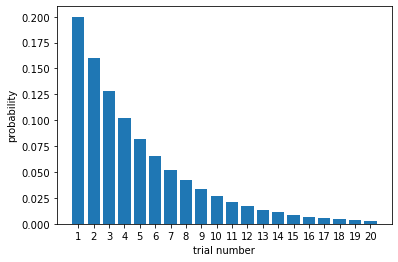

In [93]:
print(check_geometric_pmf(3, .2)) 


value = range(21)[1:]

mylist = [] 
for i in range(21)[1:]: 
    x = check_geometric_pmf(i, .2)
    mylist.append(x) 

#print(mylist) 
graph = plt.bar(x=value, height = mylist, tick_label=value)
plt.xlabel("trial number")
plt.ylabel("probability")
print(graph)

### Problem 2 (10 points)
You want to learn about architecture on Cornell campus, so in between classes you ask random people whether they are Architecture majors (who account for 3.3% of the undergraduate student body). Using your function from Q1, what is the probability that you finally run into an Architecture major in the the 5th undergraduate student you speak to?  

In [72]:
check_geometric_pmf(5, .033)

0.028854917451393

### Problem 3 (10 points)

Use `np.random.normal` to generate four normal distributions, with sizes `20`, `100`, `1000`, and `3000`. All of these distributions should have a mean of `50` and standard deviation of `20`. We've already included a random seed of `2950` at the top. Make sure to keep this line of code!

Calculate and print the mean for all four distributions and use seaborn's `displot` to visualize each distribution.

Then, explain what you notice about the means and visualizations for each distribution. What happens as the size increases? 

40.53088479453623
50.28345798240403
49.92328162760616
49.510379120805126


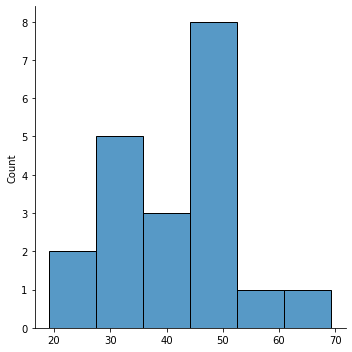

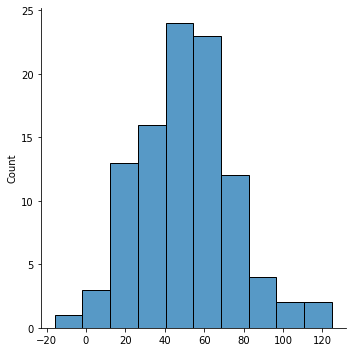

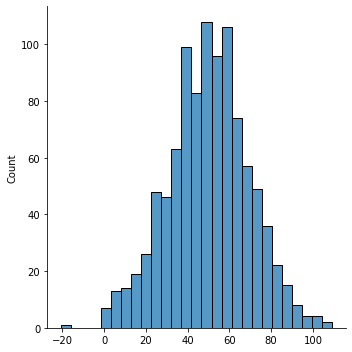

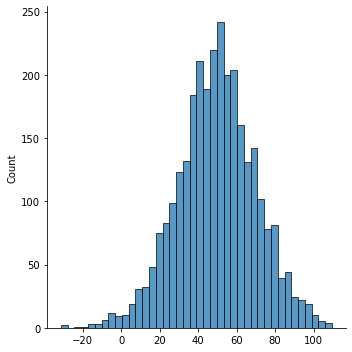

In [79]:
np.random.seed(2950)

a = np.random.normal(loc=50.0, scale=20.0, size=20)
b = np.random.normal(loc=50.0, scale=20.0, size=100)
c = np.random.normal(loc=50.0, scale=20.0, size=1000)
d = np.random.normal(loc=50.0, scale=20.0, size=3000)

print(a.mean()) 
print(sns.displot(data=a) ) 


print(b.mean())  
print(sns.displot(data=b) )


print(c.mean()) 
print(sns.displot(data=c))


print(d.mean())
print(sns.displot(data=d))


**Explain what you notice about the mean and visualizations**
Then, explain what you notice about the means and visualizations for each distribution. What happens as the size increases? 

as the size increases the mean is increasingly centred around 50, as size increases, the distributions become more and more bell-shaped and increasingly follow the normal distribution

### Problem 4 (10 points)

You've just given out an exam to 230 students, and have found that the mean and median are both 80; the variance is 25, and the histogram looks like a bell curve. Without writing any code:

1. What type of distribution might be a good model for these scores? Explain your reasoning. 
2. How many students do you expect received between a 75% and 85% on the exam? Explain your reasoning. 
3. How many students received less than a 80% on the exam? Explain your reasoning.  
4. How many students received between a 90% and 95%? Explain your reasoning. 


1. **Your answer here**
a normal distribution because I would expect this model to nicely model the number of scores I receive for the exam, centred around the mean/median and in which more extreme values (higher and lower scores) are further out along the distribution, leading to a bell-curve shape
2. **Your answer here**
about 68% because the STD is 5 and about 68% of the mass is contained within 1 STD of the Mean. so this is about 156-7 students. 
3. **Your answer here**
I would expect about 50% to have received less than an 80. In a perfect world, the mean is equal to the median and so exactly 50% would be above and below the mean. So this is 115 students. 
4. **Your answer here**
According to google, "68% of the observed data will occur within the first standard deviation, 95% will take place in the second deviation, and 99.7% within the third standard deviation" so between 90 (2 stds away) and 95 (3 stds away), I would expect about 4.7/2, or 2.35% of 230,  5.4 (or from five to six students) to have received between a 90 and a 95 

In the provided dataframe below we have data on the scientific productivity of PhD students ([source](https://rdrr.io/cran/scar/man/PhDPublications.html)). The column "articles" indicates the number of articles published in the last three years of their PhD.

In [9]:
df = pd.read_csv('PhDPublications.csv')
print(f'there are {len(df)} students')
df.head()

there are 915 students


,articles,gender,married,kids,prestige,mentor
0,0,male,yes,0,2.52,7
1,0,female,no,0,2.05,6
2,0,female,no,0,3.75,6
3,0,male,yes,1,1.18,3
4,0,female,no,0,3.75,26


### Problem 5 (10 points)

Create a histogram indicating the number of PhD students (y-axis) for each number of articles published (x-axis), with 20 bins. From the four models listed above, what do you think is the best choice to simulate the number of articles a PhD student can publish within the last three years of their PhD? Explain your reasoning.

AxesSubplot(0.125,0.125;0.775x0.755)
1.692896174863388


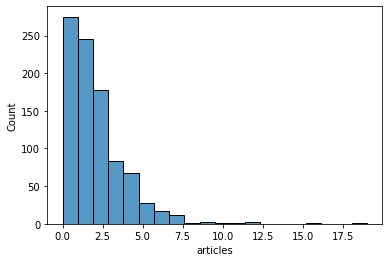

In [14]:
print(sns.histplot(data = df, x = 'articles', bins = 20 ) )


m = df['articles'].mean()
print(m)

**Explain which model you would choose**

I would use poisson because we are modelling the frequency of an event during a given time period. the number of articles in the PHD candidates last 3 years of their programme. 

### Problem 6 (10 points)

Use `np.random.poisson` to generate 4 arrays. Each array should contain 1000 draws sampled from the Poisson distribution. Each array should have a different value for the event rate (i.e. the lambda parameter). The first should have $\lambda=0.5$, the second $\lambda=1$, the third $\lambda=2$, and the fourth $\lambda=5$. Plot a histogram for each of the four sampling arrays *on the same chart*, remember to use a legend and properly label your axes.

We've already included a random seed of `2950` at the top. Make sure to keep this line of code!

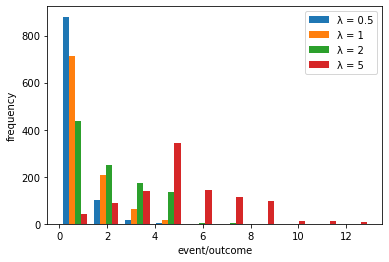

In [108]:
np.random.seed(2950)

a = np.random.poisson(lam=0.5, size=1000)
b = np.random.poisson(lam=1.0, size=1000)
c = np.random.poisson(lam=2.0, size=1000)
d = np.random.poisson(lam=5.0, size=1000)

group = [a, b, c, d]
graph = plt.hist(group, label = ['\u03BB = 0.5', '\u03BB = 1', '\u03BB = 2', '\u03BB = 5']) 
plt.xlabel("event/outcome")
plt.ylabel("frequency")
plt.legend()

# print(sns.displot(data=a)) 
# print(sns.displot(data=b))
# print(sns.displot(data=c))
# print(sns.displot(data=d))


### Problem 7 (10 points)

The poisson distribution can be used to simulate the number of events occuring within a specific interval, in this case: the number of articles a PhD student publishes in their last three years.

In 1905, Albert Einstein had an "annus mirabilis," publishing 4 seminal papers. [Wikipedia](https://en.wikipedia.org/wiki/List_of_scientific_publications_by_Albert_Einstein) indicates he published 6 papers in total during the last three years of his PhD (excluding reviews).

Create a numpy array called `draws` containing 1000 draws from the poisson distribution using the average number of articles published per student as your event rate. Then create a histogram of these draws. Finally, use `pyplot.axvline()` to overlay a red, dotted, vertical line indicating the number of articles published by Albert Einstein in the last three years of his PhD.

We've already included a random seed of `2950` at the top. Make sure to keep this line of code!

(array([471., 271., 145.,  70.,  35.,   6.,   1.,   1.]), array([0.   , 1.125, 2.25 , 3.375, 4.5  , 5.625, 6.75 , 7.875, 9.   ]), <BarContainer object of 8 artists>)


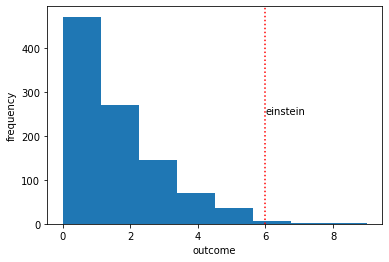

In [103]:
np.random.seed(2950)

draws = np.random.poisson(lam= m, size=1000)
draws = np.array(draws) 
#draws = np.array(draws)
print(plt.hist(draws, bins = 8)) 
plt.axvline(6, color = 'r', linestyle = ':')
plt.xlabel("outcome")
plt.ylabel("frequency")
plt.annotate("einstein", (6, 250))
plt.show()

### Problem 8 (10 points)

Using the same event rate parameter as before (i.e. the average number of articles published per student), what is the probablity that a PhD student publishes the same number of articles as Albert Einstein did in the last three years of their PhD. **Hint:** use `poisson.pmf()` from `scipy.stats`. Round your percentage to three decimal places.

In [107]:
ans = (poisson.pmf(6, m))*100 
ans = np.round_(ans, decimals=3, out=None)

print("Rounded to three decimal places the answer is " +  str(ans) + "%") 

Rounded to three decimal places the answer is 0.601%


### Problem 9 (10 points)

With the same distribution (i.e. using the same probability model), what is the probability that a student publishes more than 6 articles in the last three years of their PhD? **Hint:** use `poisson.sf()` from `scipy.stats`. Round your percentage to three decimal places.

In [106]:
ans = (poisson.sf(6, m))*100
ans = np.round_(ans, decimals=3, out=None)

print("Rounded to three decimal places the answer is " +  str(ans) + "%") 

Rounded to three decimal places the answer is 0.183%
